In [114]:
import numpy as np
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.collocations import *
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# A, B, C

In [39]:
conn = sqlite3.connect('database.sqlite')

In [40]:
cursor = conn.execute('SELECT ExtractedBodyText FROM Emails')

In [41]:
emails = [row[0] for row in cursor]

In [54]:
emails_cleared = [email.lower() for email in emails]

In [55]:
for email in emails_cleared[30:40]:
    print (email)
    print ('---------------------------------')

fyi
---------------------------------
embassy in yemen
---------------------------------
b6
sunday, march 27, 201i 9:05 pm
h: lots of new intel; possible libyan collapse. sid
hic memo lots of new intel; possible imminent collapse 032711.docx; hrc memo lots of
new intel; possible imminent collapse 032711.docx
march 27. 2011
for: hillary
from sid
re: lots of new intel; libyan army possibly on verge of collapse
latest:
during the evening of march 27, 2011, individuals with direct access to the military committee of the national
libyan council (nlc) stated in confidence that while the rebel forces continue to have organization and
communications problems, their morale has improved drastically, and they believe the libyan army is on the
verge of collapse. under attack from allied air and naval forces, the libyan army troops have begun to desert
to the rebel side in increasing numbers. the rebels are making an effort togeet these troops as fellow libyans,
in an effort to encourage additional

Видим много грязи. Надо ее почистить.

In [56]:
bad_patterns = ['fwd:', 'h:', 'fw:', 'for:', 'date:', 're:']

def clear(email):
    for bad_pattern in bad_patterns:
        email = re.sub(bad_pattern, '', email)
    email = re.sub('\n', ' ', email)
    return email
    

In [57]:
emails_cleared = list(map(lambda email: clear(email), emails_cleared))

In [58]:
for email in emails_cleared[30:40]:
    print (email)
    print ('---------------------------------')

fyi
---------------------------------
embassy in yemen
---------------------------------
b6 sunday, march 27, 201i 9:05 pm  lots of new intel; possible libyan collapse. sid hic memo lots of new intel; possible imminent collapse 032711.docx; hrc memo lots of new intel; possible imminent collapse 032711.docx march 27. 2011  hillary from sid  lots of new intel; libyan army possibly on verge of collapse latest: during the evening of march 27, 2011, individuals with direct access to the military committee of the national libyan council (nlc) stated in confidence that while the rebel forces continue to have organization and communications problems, their morale has improved drastically, and they believe the libyan army is on the verge of collapse. under attack from allied air and naval forces, the libyan army troops have begun to desert to the rebel side in increasing numbers. the rebels are making an effort togeet these troops as fellow libyans, in an effort to encourage additional defectio

In [67]:
vectorizer1 = CountVectorizer(min_df=1, ngram_range=(1, 1), stop_words='english')
matrix1 = vectorizer1.fit_transform(emails_cleared)
feature_names1 = vectorizer1.get_feature_names()
popularity1 = matrix1.sum(0)
popularity1 = np.array(popularity1)[0].tolist()

pop_list1 = [[-pop, feature] for pop, feature in zip(popularity1, feature_names1)]
pop_list1 = sorted(pop_list1)
for sub in pop_list1:
    sub[0] = -sub[0]
pop_list1[0:50]

[[2657, 'state'],
 [2133, 'pm'],
 [1359, 'secretary'],
 [1258, 'obama'],
 [1241, 'said'],
 [1129, 'president'],
 [1125, 'office'],
 [1106, 'new'],
 [1027, 'time'],
 [972, 'house'],
 [956, '2010'],
 [932, '10'],
 [907, '2009'],
 [903, '30'],
 [892, 'just'],
 [885, 'department'],
 [830, 'fyi'],
 [823, 'people'],
 [802, 'gov'],
 [765, 'like'],
 [756, 'meeting'],
 [740, 'clinton'],
 [735, 'government'],
 [713, 'know'],
 [700, 'work'],
 [677, '00'],
 [657, 'today'],
 [654, 'american'],
 [629, '15'],
 [623, 'foreign'],
 [599, '12'],
 [593, 'think'],
 [586, '11'],
 [575, 'women'],
 [569, 'policy'],
 [566, 'security'],
 [554, 'states'],
 [549, 'did'],
 [546, 'united'],
 [544, 'party'],
 [543, 'world'],
 [542, 'want'],
 [540, 'good'],
 [539, 'israel'],
 [534, 'support'],
 [531, 'mr'],
 [530, 'political'],
 [519, 'right'],
 [517, 'year'],
 [508, 'room']]

Ничего лишнего

# D

In [68]:
vectorizer2 = CountVectorizer(min_df=1, ngram_range=(2, 2), stop_words='english')
matrix2 = vectorizer2.fit_transform(emails_cleared)

In [69]:
type(matrix2)

scipy.sparse.csr.csr_matrix

In [70]:
feature_names2 = vectorizer2.get_feature_names()

In [71]:
popularity2 = matrix2.sum(0)
popularity2 = np.array(popularity2)[0].tolist()
pop_list2 = [[-pop, feature] for pop, feature in zip(popularity2, feature_names2)]
pop_list2 = sorted(pop_list2)
for sub in pop_list2:
    sub[0] = -sub[0]
pop_list2[0:20]

[[761, 'state gov'],
 [460, 'secretary office'],
 [455, 'state department'],
 [449, 'united states'],
 [447, '00 pm'],
 [424, 'white house'],
 [337, '30 pm'],
 [315, 'en route'],
 [293, 'department state'],
 [280, 'pm secretary'],
 [248, 'secretary state'],
 [245, 'new york'],
 [243, 'clintonemail com'],
 [226, 'state dept'],
 [217, 'private residence'],
 [216, 'agreement sensitive'],
 [216, 'benghazi comm'],
 [216, 'dept produced'],
 [216, 'foia waiver'],
 [216, 'house select']]

Вот такие биграммы самые популярные

# E

In [86]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(
    nltk.tokenize.word_tokenize(''.join(emails_cleared)),
    window_size=20)


In [87]:
finder.nbest(bigram_measures.pmi, 30)

[("'chopsticks", 'semi-sinic'),
 ('-ec', '100m'),
 ('//www.ft.com/cms/s/o/df53a396-3c2a-11df-b40c-00144feabdc0.html',
  'accesskev'),
 ('/03d', '3d'),
 ('01:58', 'ith'),
 ('01:58', 'this..'),
 ('04/18/10', '9:21'),
 ('06:15', '17:45'),
 ('127fuchsmh', 'numbersfuchsmh'),
 ('17:45', '18:15'),
 ('2010-03-09', '18:12:21,341'),
 ('20:43', 'comeback'),
 ('22:46', 'caravans'),
 ('22:48', '1932'),
 ('23.08.10', 'ith'),
 ('23.08.10', 'this..'),
 ('2btve/o2fzmoudcphofsl3fran', '3d'),
 ('2fwknab1e6n', '3d'),
 ('2fzr', '3d'),
 ('310', '312'),
 ('312', '906-5256'),
 ('312', 'alumsakentlaw.edu'),
 ('312', 'www.alumni.kentlaw.edu'),
 ('3d', '11,161'),
 ('3d', 'oscers'),
 ('3d', '—crossed'),
 ('3ws', '00:56'),
 ('3ws', '26.08.10'),
 ('4.muhammad', 'al-sahati'),
 ('50/50', 'democrat-controlled')]

In [90]:
finder.apply_freq_filter(18)
finder.nbest(bigram_measures.pmi, 50)

[('.ap_popover_sprited', '.ap_popover_sprited'),
 ('clntinet08.clinton.local', 'fe80'),
 ('2009-12-31', 'lewis'),
 ('{', '}'),
 ('amp', 'amp'),
 ('san', 'francisco'),
 ('westchester', 'county'),
 ('vargas', 'llosa'),
 ('winner', 'winner'),
 ('bin', 'laden'),
 ('brnagn', 'degree'),
 ('coll', 'degree'),
 ('degree', 'cath'),
 ('degree', 'evngl'),
 ('degree', 'prot'),
 ('nocoll', 'degree'),
 ('cingular', 'xpress'),
 ('smone', 'vol'),
 ('smone', 'wld'),
 ('connected', 'connected'),
 ('clips', 'clips'),
 ('sri', 'lanka'),
 ('andrews', 'afb'),
 ('leslie', 'gelb'),
 ('hv', 'hrd'),
 ('gt', 'gt'),
 ('andrews', 'tail'),
 ('ind', 'wht'),
 ('tot', 'wht'),
 ('verizon', 'wireless'),
 ('disapproval', 'rating'),
 ('6:00', '6:10'),
 ('worn', 'wht'),
 ('tot', 'ind'),
 ('saudi', 'arabia'),
 ('tot', 'worn'),
 ('ind', 'worn'),
 ('xpress', 'mail'),
 ('port', 'au'),
 ('dem', 'ind'),
 ('cingular', 'mail'),
 ('dem', 'wht'),
 ('revolutionary', 'guards'),
 ('sinn', 'fein'),
 ('tot', 'dem'),
 ('2201', 'nw'),
 ('in

# F

In [96]:
tfidf_vectorizer = TfidfVectorizer(max_features = 3000)
tfidf_matrix = tfidf_vectorizer.fit_transform(emails_cleared)

In [134]:
n_clusters = 3
cluster_builder = KMeans(n_clusters=3)

In [119]:
emails_y = cluster_builder.fit_predict(tfidf_matrix)

In [120]:
tsne = TSNE()
compressed_emails = tsne.fit_transform(tfidf_matrix.todense())

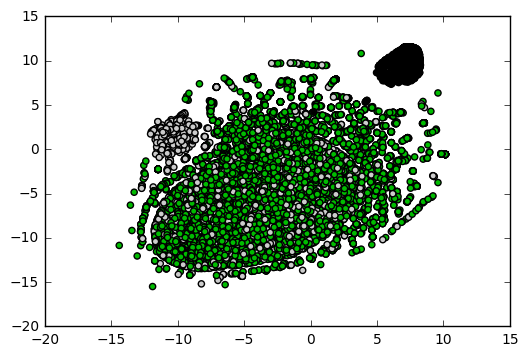

In [121]:
plt.scatter(compressed_emails[:, 0], compressed_emails[:, 1], c=emails_y, cmap='nipy_spectral')
plt.show()

In [130]:
print (len(emails_y))

7945


In [143]:
emails_y += 1
print (set(emails_y))

{1, 2, 3}


In [150]:
print (len(emails_cleared))

7945


# F, G

In [151]:
import collections
averages = []
for i in range(n_clusters + 1):
    averages.append(collections.Counter())

for i in range(len(emails_cleared)):
    if i % 100 == 0:
        print (i)
    email = emails_cleared[i]
    for word in nltk.tokenize.word_tokenize(email):
        if word in feature_names1:
            averages[0][word] += 1
            averages[emails_y[i]][word] += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900


In [157]:
for cluster in range(n_clusters + 1):
    print (averages[cluster].most_common(10))
    print ('')

[('pm', 2127), ('state', 1660), ('secretary', 1343), ('said', 1238), ('obama', 1236), ('office', 1119), ('president', 1105), ('new', 1096), ('time', 995), ('house', 961)]

[('fyi', 446), ('b6', 11), ('forwarded', 3), ('message', 2), ('cryptic', 1), ('christmas', 1), ('sigh', 1), ('paymasters', 1), ('just', 1), ('messa', 1)]

[('pm', 1923), ('office', 832), ('secretary', 795), ('state', 580), ('2009', 484), ('meeting', 442), ('2010', 435), ('room', 416), ('department', 413), ('arrive', 319)]

[('said', 1185), ('obama', 1180), ('state', 1080), ('president', 1004), ('new', 972), ('people', 794), ('time', 692), ('government', 690), ('house', 686), ('clinton', 682)]



In [172]:
def create_text(counter):
    text = ''
    for key, value in counter:
        for i in range(value):
            text += (key + ' ')
    return text

In [189]:
texts = []
for cluster in range(1, n_clusters + 1):
    popularity = collections.Counter()
    for word in feature_names1:
        coeff = float(averages[cluster][word]) / (averages[cluster][word] + averages[0][word] + 1)
        coeff = coeff ** 2
        popularity[word] = int(averages[cluster][word] * coeff)
    # print (popularity.most_common(20))
    texts.append(create_text(popularity.most_common(50)))


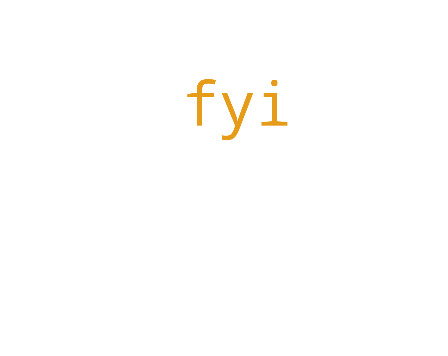

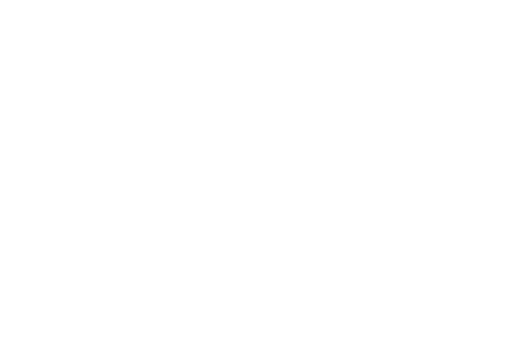

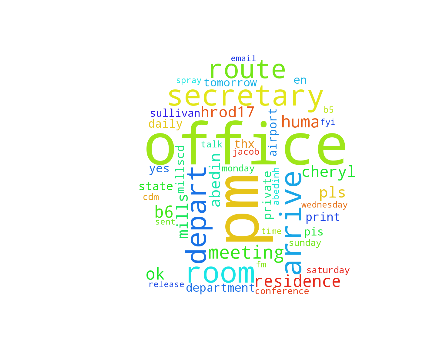

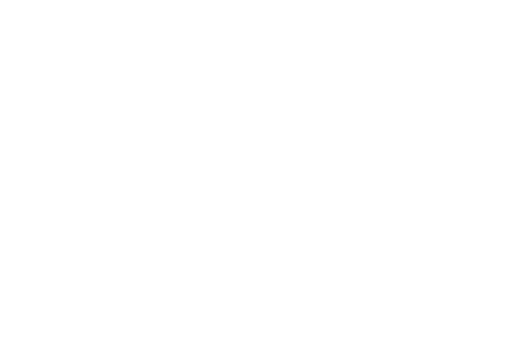

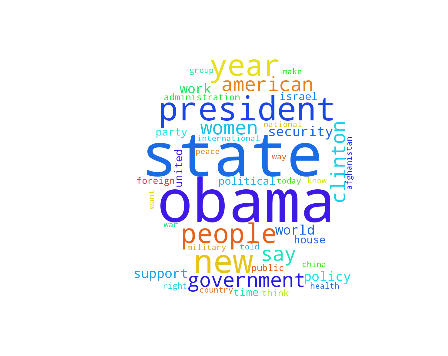

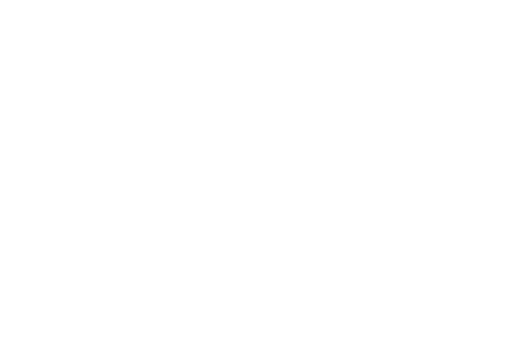

In [190]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import skimage
from skimage import io

for text in texts:
    mask = skimage.io.imread('sphere-005.jpg')
    
    wc = WordCloud(background_color="white", max_words=2000, mask=mask,
                   stopwords=STOPWORDS.add("said"))
    # generate word cloud
    wc.generate(text)

    # show
    plt.imshow(wc)
    plt.axis("off")
    plt.figure()
    plt.axis("off")
    plt.show()